# Data Exploration, Exploratory Data Analysis

We first have to imort essential modules

In [2]:
import sklearn as sk
import pandas as pd
import numpy as np
import os as os
import seaborn as sb
import matplotlib.pyplot as plt
from python_speech_features import fbank

## Loading Sound Files

Loading Audio File with Alice voice

In [3]:
import librosa
# function to load files and extract features
file_name = "audio/al_1.wav"
file = os.path.join(file_name)

# allowing playing of the loaded file
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
xal, sral = librosa.load(file_name)
ipd.Audio(xal, rate=sral)

Loading Audio File with Hitesh voice

In [4]:
import librosa
# function to load files and extract features
file_name = "audio/hi_1.wav"
file = os.path.join(file_name)

# allowing playing of the loaded file
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
xhi, srhi = librosa.load(file_name)
ipd.Audio(xhi, rate=srhi)

Loading Audio File with Simrita voice

In [5]:
import librosa
# function to load files and extract features
file_name = "audio/si_1.wav"
file = os.path.join(file_name)

# allowing playing of the loaded file
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
xsi, srsi = librosa.load(file_name)
ipd.Audio(xsi, rate=srsi)

Plotting the WavePlots of All our voices togther

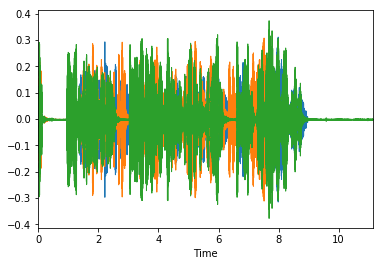

In [7]:
librosa.display.waveplot(xal, sr=sral)
librosa.display.waveplot(xhi, sr=srhi)
librosa.display.waveplot(xsi, sr=srsi)

Plotting all the waveplots of our different voices together shows that there is no visible differences when obsereved thus we had to find another method to distinguish our voices

# Data Preperation

## Mel-frequency cepstral coefficients(MFCC)

In [11]:
import librosa
# function to load files and extract features
file_name = "audio/2_pitches.wav"
file = os.path.join(file_name)

# allowing playing of the loaded file
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
x, sr = librosa.load(file_name)
ipd.Audio(x, rate=sr)

In [12]:
# handle exception to check if there isn't a file which is corrupted
try:
  # here kaiser_fast is a technique used for faster extraction
  X, sample_rate = librosa.load(file, res_type='kaiser_fast') 
  # we extract average mfcc feature from data
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
  # we extract mfcc feature from data
  x=librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)  
except Exception as e:
  print("Error encountered while parsing file: ", file)

# creating dataframe
feature = mfccs
X = pd.DataFrame(x)
X

,0,1,2,3,4,5,6,7,8,9,...,281,282,283,284,285,286,287,288,289,290
0,-521.086447,-521.086447,-521.086447,-521.086447,-521.086447,-521.086447,-521.086447,-521.086447,-521.086447,-521.086447,...,-428.402509,-433.646040,-419.451058,-411.140695,-416.289695,-411.949233,-409.890939,-405.786437,-386.521169,-375.349313
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,90.926612,90.836876,106.012666,113.376194,108.230665,112.502527,111.483414,114.284302,129.348424,123.463194
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,28.045043,30.098731,36.266346,37.312832,36.913963,37.478513,33.728932,31.130480,35.161169,28.718157
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-3.928763,-1.063380,1.350821,1.084339,3.600557,1.788081,3.647261,0.451371,7.630570,17.361450
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-2.102172,1.193099,6.149643,5.700550,6.724264,5.215152,11.108092,12.907604,17.045087,13.396280
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.290926,6.310383,13.418286,11.585715,10.317125,10.380968,13.529978,17.851946,18.400923,14.236302
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.960601,4.090364,9.505815,8.502825,7.566280,7.560168,9.299802,10.622693,15.812024,15.772329
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.191197,2.526876,6.325508,7.452203,5.962238,4.929872,8.945238,8.501468,14.738019,14.050970
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.923613,0.406862,6.004642,7.096354,1.300812,2.154519,7.280209,8.091448,10.525792,12.019389
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.813566,-6.577994,0.974421,1.270112,-7.786485,-3.872111,1.552461,1.288615,3.576911,4.176679


Visualising MFCC Features, each feature corresponds to a colour

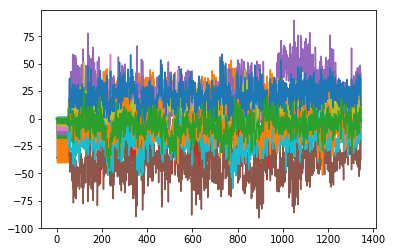

In [13]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt

(rate,sig) = wav.read(file_name)
mfcc_feat = mfcc(sig,rate)

#print(mfcc_feat)
plt.plot(mfcc_feat)
plt.show()

# Cluster validation, Model Tuning

## Elbow Method

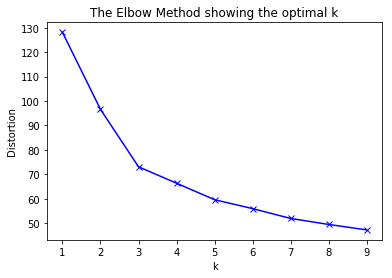

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X.T)
    distortions.append(sum(np.min(cdist(X.T, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.T.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

We tried formulating a algorithm to choose the optimal elbow point

In [17]:
# dosent work still need to find an algorithm on choosing the optimal k
dot=[]
for k in range (2,9):
    y1=distortions[k-2]-distortions[k-1]
    x1= -1
    y2=distortions[k]-distortions[k-1]
    x2=1
    dot_pro = (y1*y2)+(x1*x2)
    mag_1=((x1*x1)+(y1*y1))**(1/2)
    mag_2=((x2*x2)+(y2*y2))**(1/2)
    dot.append(dot_pro/(mag_1*mag_2))

print(dot)
print(np.argmin(np.array(dot)))   
#print(sorteddot)

[-0.9999415711782066, -0.9944857264301191, -0.9999997351833791, -0.9926616693268232, -0.9996985447533902, -0.9899169997108942, -0.9993624829923047]
2


## Gap Statistic

In [19]:
from sklearn.cluster import KMeans
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)

        # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

k, gapdf = optimalK(X.T, nrefs=5, maxClusters=400)
print ('Optimal k is: ', k)

plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()

/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (281) found smaller than n_clusters (282). Possibly due to duplicate points in X.
  return_n_iter=True)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (281) found smaller than n_clusters (283). Possibly due to duplicate points in X.
  return_n_iter=True)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (281) found smaller than n_clusters (284). Possibly due to duplicate points in X.
  return_n_iter=True)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (281) found smaller than n_clusters (285). Possibly due to duplicate points in X.
  return_n_iter=True)
/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of di

ValueError: n_samples=291 should be >= n_clusters=292

## Average Sihouette Score

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

total =0
for i in range (2,10):
    clusterer = KMeans (n_clusters=i)
    preds = clusterer.fit_predict(x0.T)
    centers = clusterer.cluster_centers_

    score = silhouette_score (x0.T, preds, metric='euclidean')
    print ("For n_clusters =", i, "average silhouette score is", score/i)

## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 50, 100],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid = GridSearchCV(random_forest_classifier, param_grid = param_grid, cv = 5, verbose = 5, n_jobs = -1)
grid.fit(train_X, train_y)

best_estimator = grid.best_estimator_.grid_scores_

# Clustering Models
find a way to compare the effectiveness of each model to prove our finding that kmeans is the most accurate

## KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans
num_clust = 2
kmeans = KMeans(n_clusters = num_clust)
kmeans.fit(x0.T)
labels = kmeans.predict(x0.T)

## Spectral Clustering

In [ ]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans', n_clusters=3, n_init=10, n_jobs=None)
sc.fit(x0.T)
labels = sc.labels_

## Means Shift

In [ ]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

bw = estimate_bandwidth(x0.T, quantile=0.3, n_samples=None, random_state=0, n_jobs=None)
ms = MeanShift(bandwidth=bw, bin_seeding=True)
ms.fit(x0.T)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

labels = ms.predict(x0.T)

## DBScan

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=np.e**-6, min_samples=0.1)
labels = db.fit_predict(x0.T)

## Gaussian Mixture Models (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3)
gm.fit(x0.T)
labels = gm.predict(x0.T)
labels

## Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH)

In [ ]:
from sklearn.cluster import Birch
brc = Birch(n_clusters = 3)
brc.fit(x0.T)
labels = brc.fit_predict(x0.T)
labels

## Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters = 3)
ac.fit(x0.T)
labels = ac.fit_predict(x0.T)
labels

# Try on Piano Notes

## Training Model

In [20]:
import pandas as pd
import _pickle as cPickle
import numpy as np
from scipy.io.wavfile import read
from sklearn.cluster import KMeans
import warnings
import numpy as np
from sklearn import preprocessing
import python_speech_features as mfcc
warnings.filterwarnings("ignore")

def extract_features(audio,rate):  
    mfcc_feat = mfcc.mfcc(audio,rate, 0.025, 0.01,41,appendEnergy = True,nfft=1500)
    mfcc_feat=np.array(pd.DataFrame(mfcc_feat).drop(0,axis=1))
    mfcc_feat = preprocessing.scale(mfcc_feat)
    return mfcc_feat 

dest = "clusters_p/"

train_file = "train_p.txt"        


file_paths = open(train_file,'r',encoding='utf-8-sig')

count = 1


features = np.asarray(())
for path in file_paths:    
    path = path.strip()   
    print (path)
    
    # read the audio
    sr,audio = read(path)
    
    # extract 40 dimensional MFCC & delta MFCC features
    vector   = extract_features(audio,sr)
    
    if features.size == 0:
        features = vector
    else:
        features = np.vstack((features, vector))
    # when features of 5 files of speaker are concatenated, then do model training
    if count == 4:    
        kmeans = KMeans(n_clusters= 16, max_iter = 200, algorithm="full",n_init = 3)
        kmeans.fit(features)
        
        # dumping the trained gaussian model
        picklefile = path.split("/")[2]+".kme"
        print (picklefile)
        cPickle.dump(kmeans,open(dest + picklefile,'wb'))
        print ('+ modeling completed for speaker:',picklefile," with data point = ",features.shape)    
        features = np.asarray(())
        count = 0
    count = count + 1

data_p/alice/p_1.wav
data_p/alice/p_1_0.wav
data_p/alice/p_1_1.wav
data_p/alice/p_1_2.wav
p_1_2.wav.kme
+ modeling completed for speaker: p_1_2.wav.kme  with data point =  (7284, 25)
data_p/simrita/p_2.wav
data_p/simrita/p_2_0.wav
data_p/simrita/p_2_1.wav
data_p/simrita/p_2_2.wav
p_2_2.wav.kme
+ modeling completed for speaker: p_2_2.wav.kme  with data point =  (8039, 25)
data_p/hitesh/p_3.wav
data_p/hitesh/p_3_0.wav
data_p/hitesh/p_3_1.wav
data_p/hitesh/p_3_2.wav
p_3_2.wav.kme
+ modeling completed for speaker: p_3_2.wav.kme  with data point =  (8240, 25)


## Testing Accuracy of Model on Individual Notes

data_p/alice/p_1_3.wav
2    192
1     11
0      4
Name: 0, dtype: int64
Speaker classified:  clusters_p/p_1_2.wav


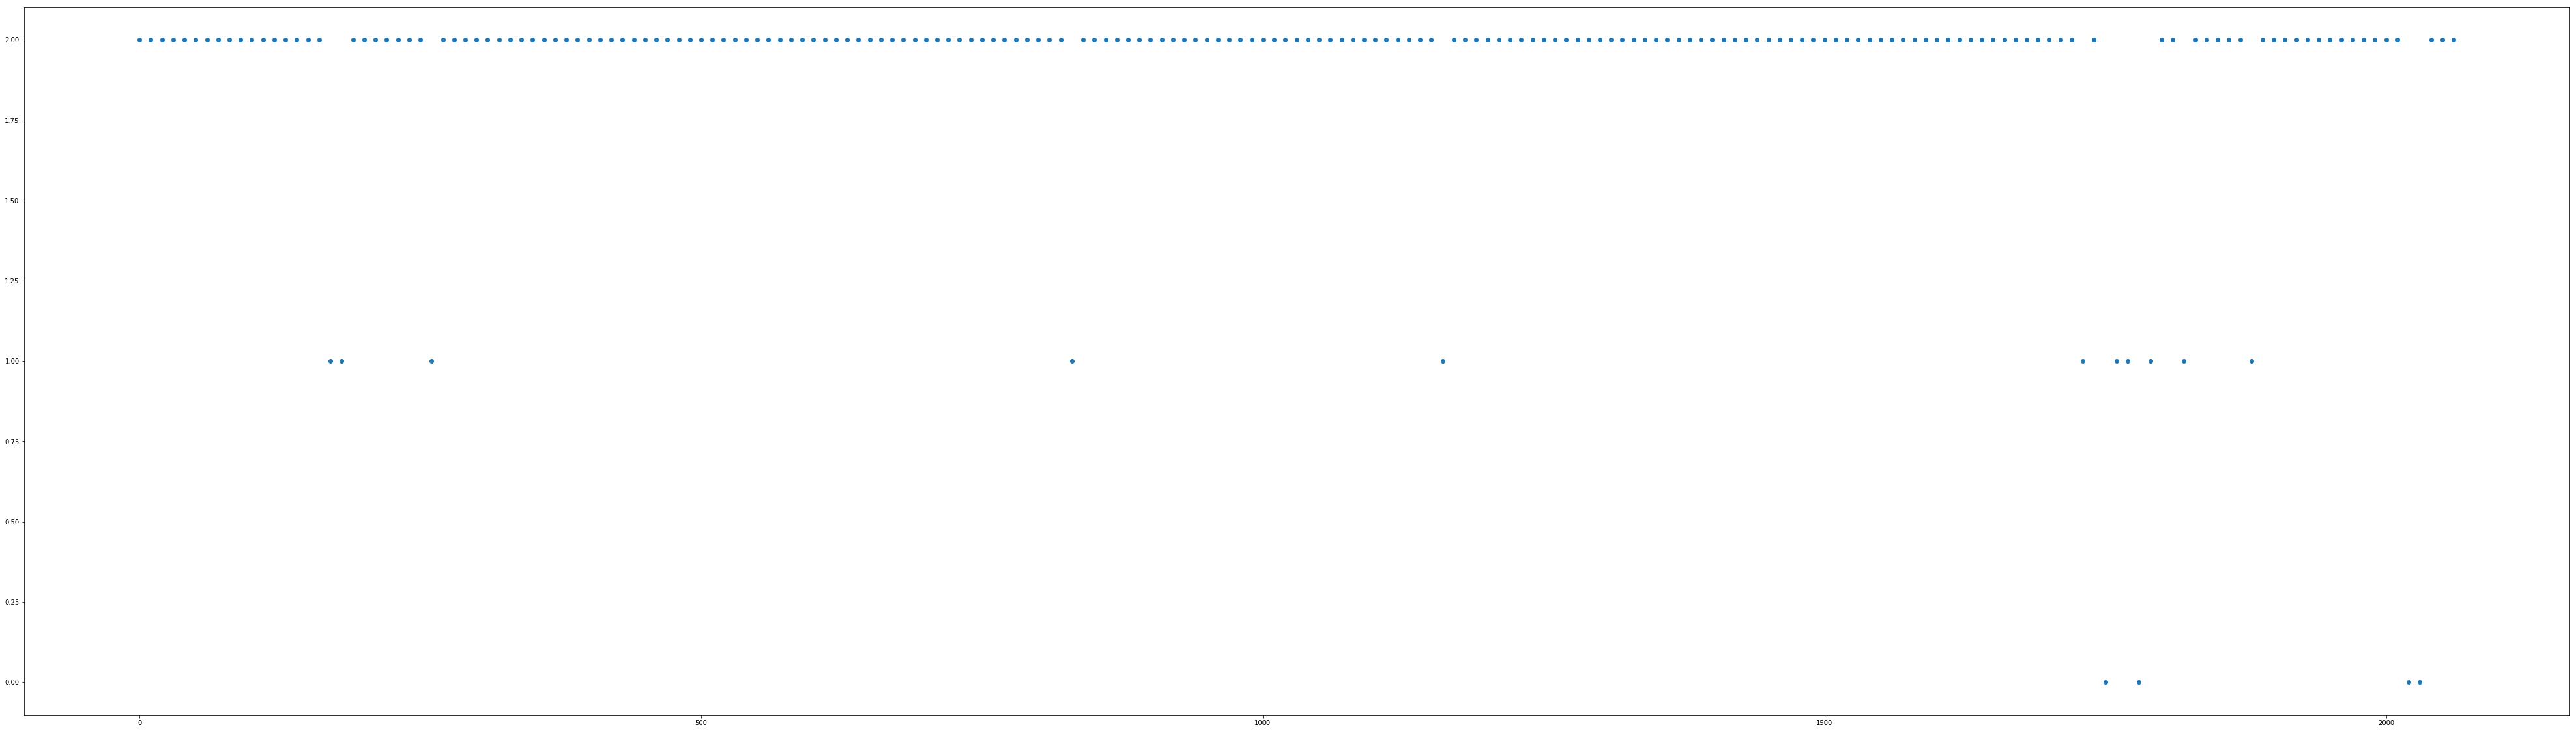

data_p/simrita/p_2_3.wav
1    212
2      2
0      1
Name: 0, dtype: int64
Speaker classified:  clusters_p/p_2_2.wav


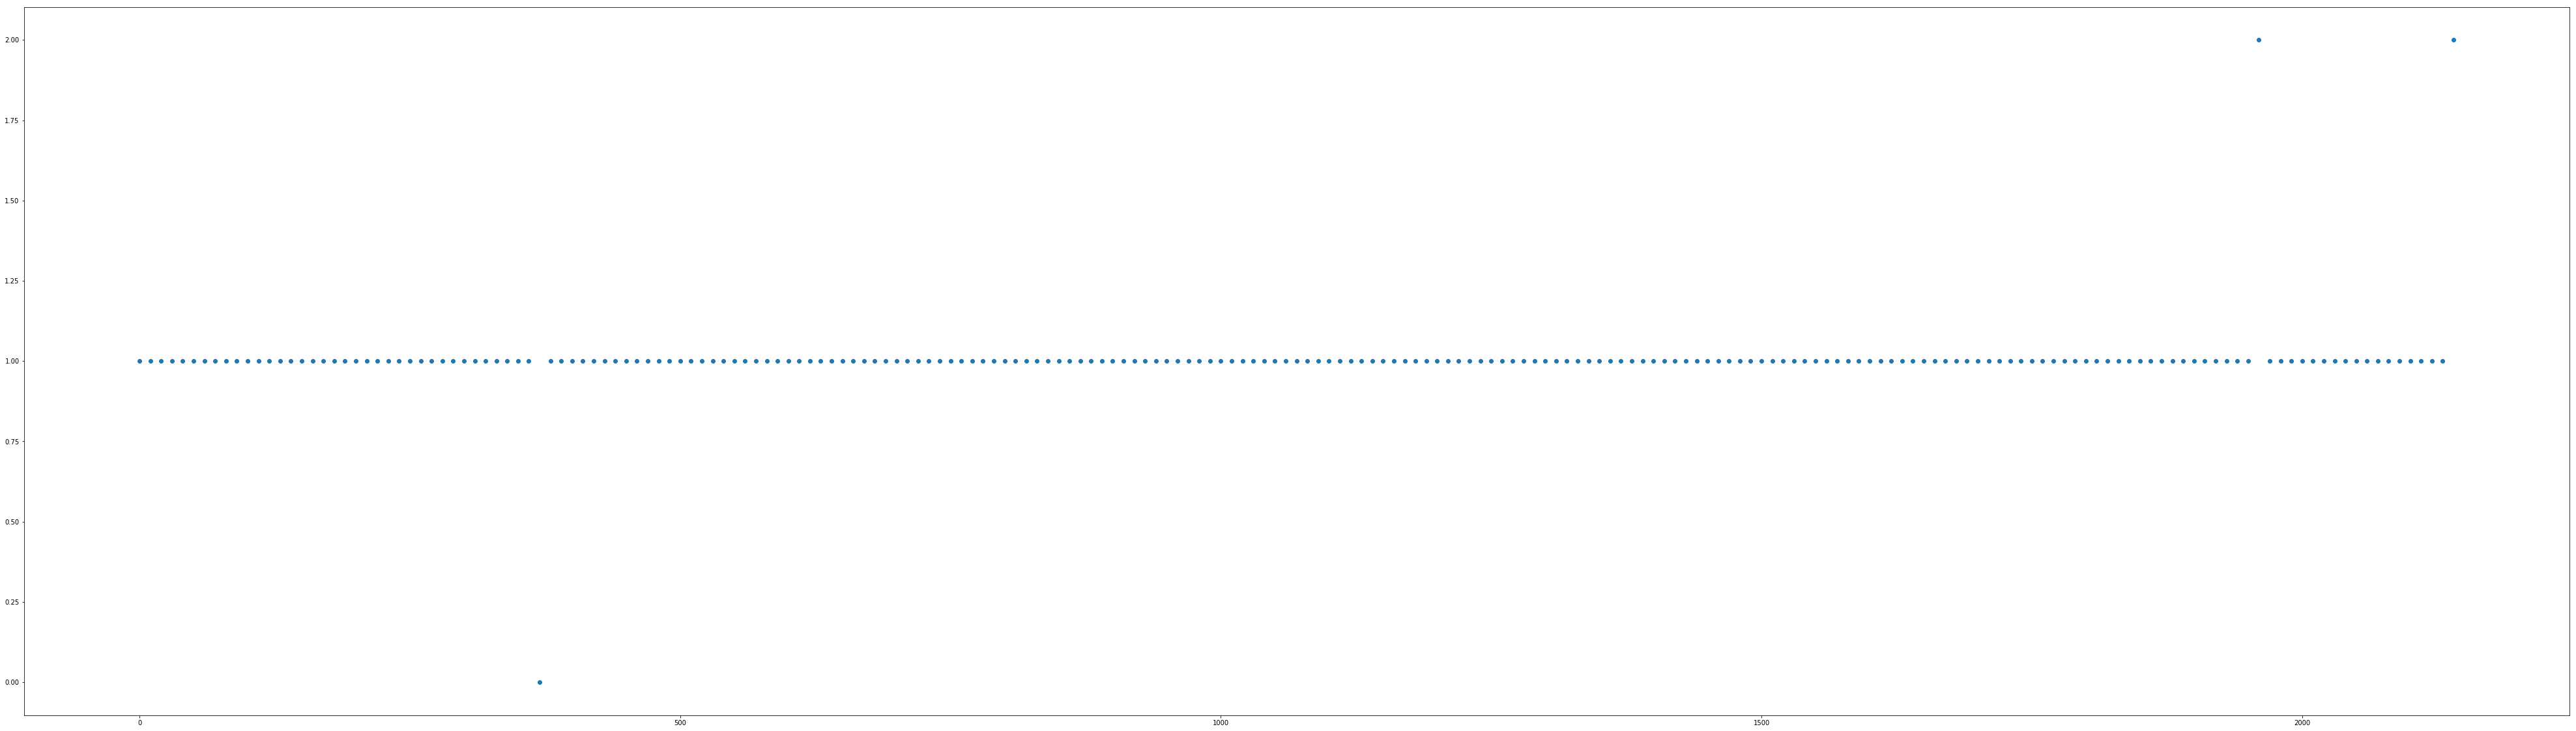

data_p/hitesh/p_3_3.wav
0    193
2     10
1      6
Name: 0, dtype: int64
Speaker classified:  clusters_p/p_3_2.wav


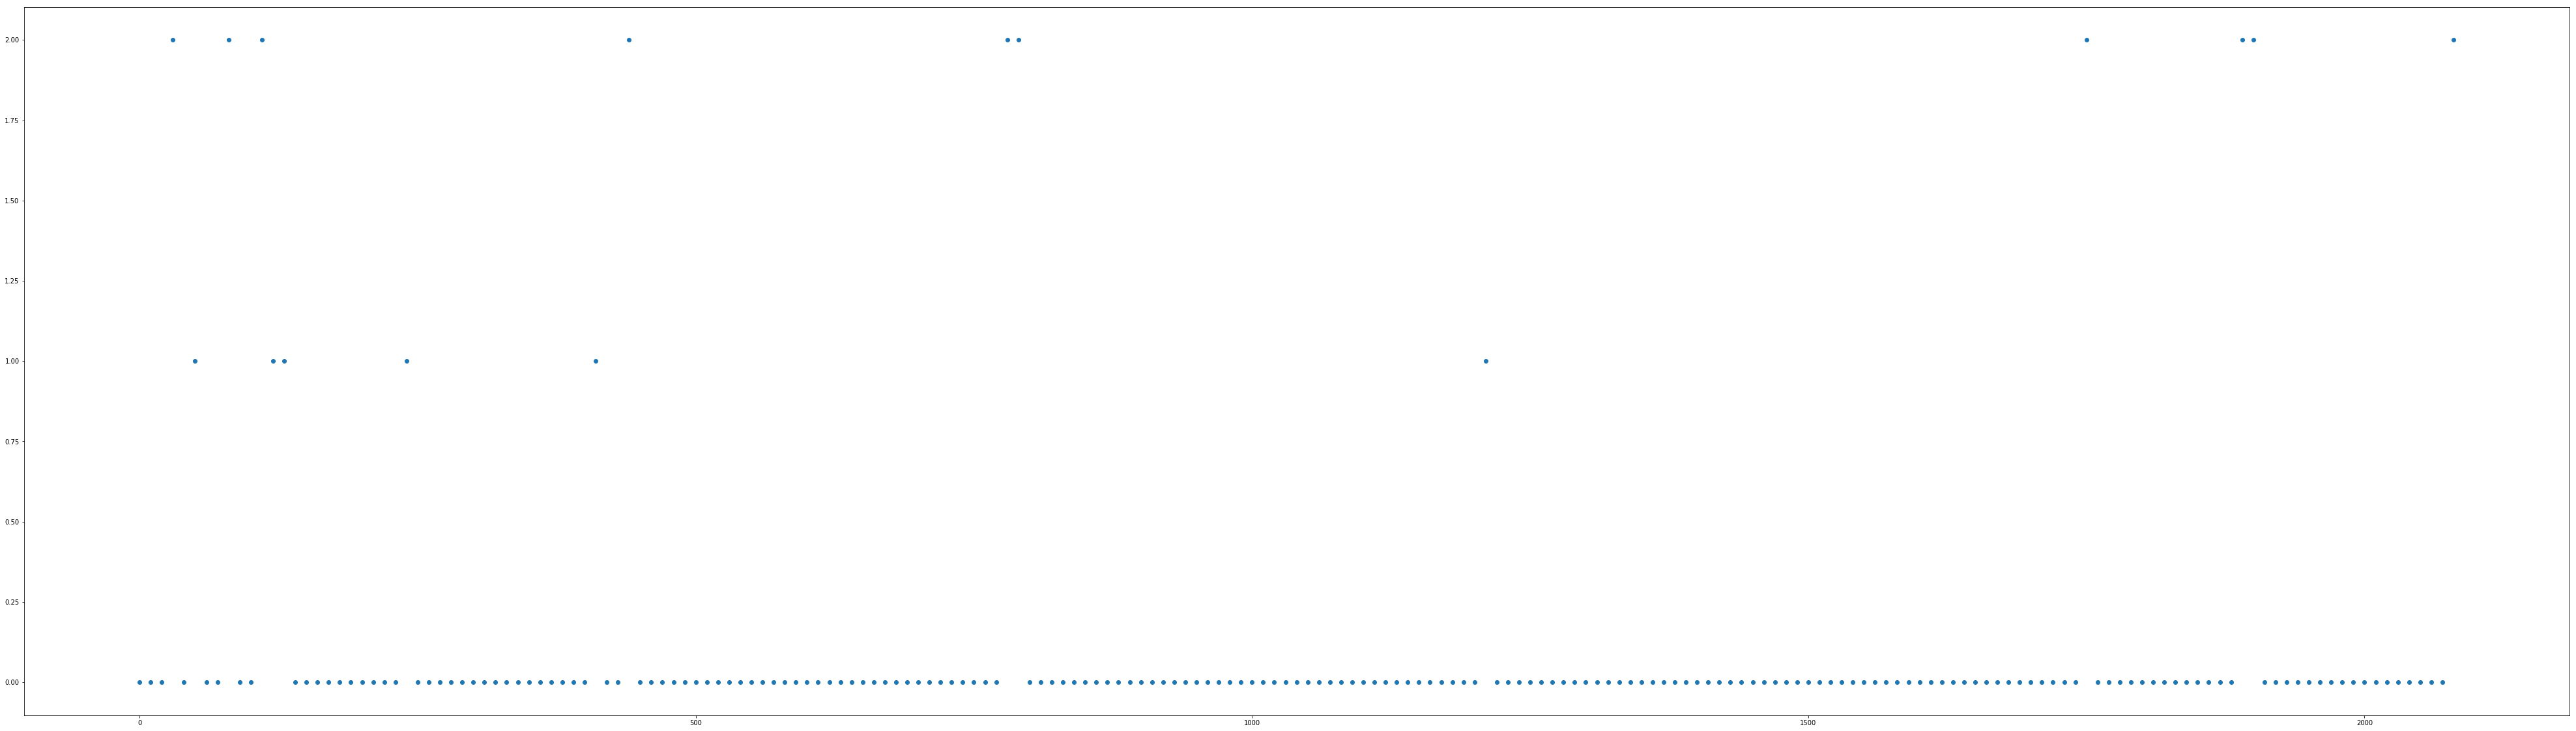

In [21]:
import os
import _pickle as cPickle
import numpy as np
from scipy.io.wavfile import read
import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd
import numpy as np
from sklearn import preprocessing
import python_speech_features as mfcc
import matplotlib.pyplot as plt

def extract_features(audio,rate):
    mfcc_feat = mfcc.mfcc(audio,rate, 0.025, 0.01,41,appendEnergy = True,nfft=1500)
    mfcc_feat=np.array(pd.DataFrame(mfcc_feat).drop(0,axis=1))
    mfcc_feat = preprocessing.scale(mfcc_feat)
    return mfcc_feat

modelpath = "clusters_p/"

test_file = "test_p.txt"        

file_paths = open(test_file,'r',encoding='utf-8-sig')


gmm_files = [os.path.join(modelpath,fname) for fname in 
              os.listdir(modelpath) if fname.endswith('.kme')]

#Load the Gaussian gender Models
models    = [cPickle.load(open(fname,'rb')) for fname in gmm_files]
speakers   = [fname.split("\\")[-1].split(".kme")[0] for fname 
              in gmm_files]

# Read the test directory and get the list of test audio files 
for path in file_paths:   
    
    path = path.strip()   
    print (path)
    sr,audio = read(path)
    vector   = extract_features(audio,sr)
    out = []
    for x in (range(0,vector.shape[0],10)):
        z = vector[x:x+20]
        log_likelihood = np.zeros(len(models)) 
        for i in range(len(models)):
            kmeans    = models[i]         #checking with each model one by one
            scores = np.array(kmeans.score(z))
            log_likelihood[i] = scores
        winner = np.argmax(log_likelihood)
        out.append(winner)
    pd.DataFrame(out)[0].unique()
    print(pd.DataFrame(out)[0].value_counts())
    print("Speaker classified: ", speakers[(pd.DataFrame(out)[0].value_counts().index[0])])
    f,ax = plt.subplots(1,1,figsize=(70,20))
    ax.scatter(x = np.arange(0,vector.shape[0],10),y=out)
    plt.show()

## Testing Accuracy of Model on Multiple Notes

1    1493
2    1059
0     327
Name: 0, dtype: int64
Speaker classified:  clusters_p/p_2_2.wav


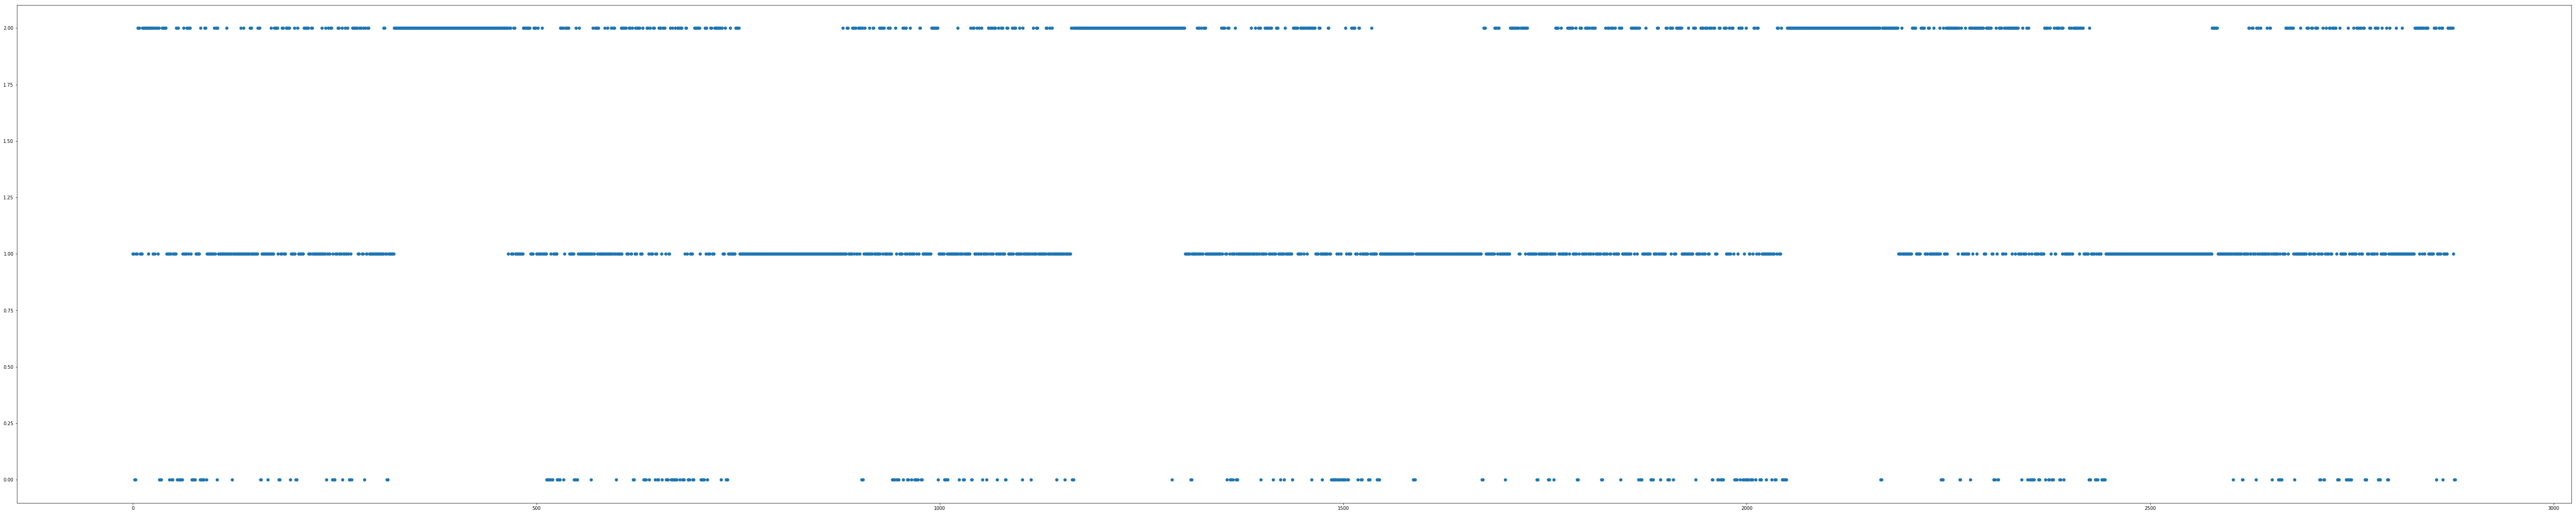

In [22]:
modelpath = "clusters_p/"


gmm_files = [os.path.join(modelpath,fname) for fname in 
              os.listdir(modelpath) if fname.endswith('.kme')]

#Load the Gaussian gender Models
models    = [cPickle.load(open(fname,'rb')) for fname in gmm_files]
speakers   = [fname.split("\\")[-1].split(".kme")[0] for fname 
              in gmm_files]

# Read the test directory and get the list of test audio files 

sr,audio = read("p_3.wav")
vector   = extract_features(audio,sr)
out = []
for x in (range(0,vector.shape[0],1)):
    z = vector[x]
    log_likelihood = np.zeros(len(models)) 
    for i in range(len(models)):
        kmeans    = models[i]         #checking with each model one by one
        scores = np.array(kmeans.score(z.reshape(1,-1)))
        log_likelihood[i] = scores
    winner = np.argmax(log_likelihood)
    out.append(winner)
pd.DataFrame(out)[0].unique()
print(pd.DataFrame(out)[0].value_counts())
print("Speaker classified: ", speakers[(pd.DataFrame(out)[0].value_counts().index[0])])
f,ax = plt.subplots(1,1,figsize=(100,20))
ax.scatter(x = np.arange(0,vector.shape[0],1),y=out)
plt.show()

## Identifying Pure Notes and Extracting them

In [45]:
time = np.arange(0,vector.shape[0],1)
time = time.tolist()

from itertools import groupby
L = out
grouped_L = [(k, sum(1 for i in g)) for k,g in groupby(L)]
cluster_time = []
time_seperate = []
k=0
counter=0
for i in grouped_L:
    cluster_time.append(i[1])
for i in cluster_time:
    j=0
    first = time[k]
    while (j != i):
        k +=1
        j+=1
    last = time[k-1]
    time_seperate.append([first,last,i,grouped_L[counter][0]])
    counter +=1
def sortThird(val): 
    return val[2] 
time_seperate.sort(key = sortThird, reverse = True)

cluster_0 = []
cluster_1 = []
cluster_2 = []

for i in range (0,len(time_seperate)):
    if time_seperate[i][3] == 1:
        cluster_1.append(time_seperate[i])
    if time_seperate[i][3] == 0:
        cluster_0.append(time_seperate[i])
    if time_seperate[i][3] == 2:
        cluster_2.append(time_seperate[i])        
        
cluster_slice = [cluster_0[0],cluster_1[0],cluster_2[0]]
from pydub import AudioSegment
for i in range(0,len(cluster_slice)):
    t1 = cluster_slice[i][0]*10/2
    t2 = cluster_slice[i][1]*10/2
    newAudio = AudioSegment.from_wav("p_3.wav")
    newAudio = newAudio[t1:t2]
    newAudio.export('p_3_'+str(i)+'.wav', format="wav")

## Original Audio

In [46]:
import librosa
# function to load files and extract features
file_name = "p_3.wav"
file = os.path.join(file_name)

# allowing playing of the loaded file
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
x, sr = librosa.load(file_name)
ipd.Audio(x, rate=sr)

## Sliced Audio: Dectecting Notes

We run MFCC through the sliced audio

In [47]:
import librosa
# function to load files and extract features
file_name = "p_3_0.wav"
file1 = os.path.join(file_name)

# allowing playing of the loaded file
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
x, sr = librosa.load(file_name)
ipd.Audio(x, rate=sr)

In [54]:
import librosa
# function to load files and extract features
file_name = "p_3_1.wav"
file2 = os.path.join(file_name)

# allowing playing of the loaded file
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
x, sr = librosa.load(file_name)
ipd.Audio(x, rate=sr)

In [62]:
# handle exception to check if there isn't a file which is corrupted
try:
  # here kaiser_fast is a technique used for faster extraction
  X, sample_rate = librosa.load(file2, res_type='kaiser_fast') 
  # we extract average mfcc feature from data
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
  # we extract mfcc feature from data
  x=librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)  
except Exception as e:
  print("Error encountered while parsing file: ", file)

# creating dataframe
feature = mfccs
X = pd.DataFrame(x)
X = X.T
X['Cluster'] = 0

In [56]:
import librosa
# function to load files and extract features
file_name = "p_3_2.wav"
file3 = os.path.join(file_name)

# allowing playing of the loaded file
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
x, sr = librosa.load(file_name)
ipd.Audio(x, rate=sr)

In [60]:
# handle exception to check if there isn't a file which is corrupted
try:
  # here kaiser_fast is a technique used for faster extraction
  X1, sample_rate = librosa.load(file3, res_type='kaiser_fast') 
  # we extract average mfcc feature from data
  mfccs = np.mean(librosa.feature.mfcc(y=X1, sr=sample_rate, n_mfcc=40).T,axis=0)
  # we extract mfcc feature from data
  x=librosa.feature.mfcc(y=X1, sr=sample_rate, n_mfcc=40)  
except Exception as e:
  print("Error encountered while parsing file: ", file)

# creating dataframe
feature = mfccs
X2 = pd.DataFrame(x)
X2 = X2.T
X2['Cluster'] = 1

## Visualising Clustering, 1 Feature against Frames

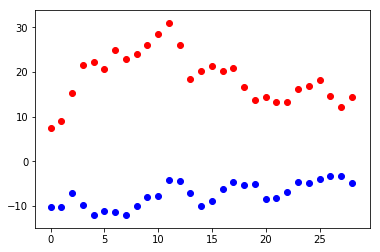

In [63]:
for i in range(0,29):
    plt.scatter(x = i, y = X2.iloc[i,39], c = 'r', data = X2)
    plt.scatter(x = i, y = X.iloc[i,39], c = 'b', data = X)   

## Principle Component Analysis (PCA) for Visualisation

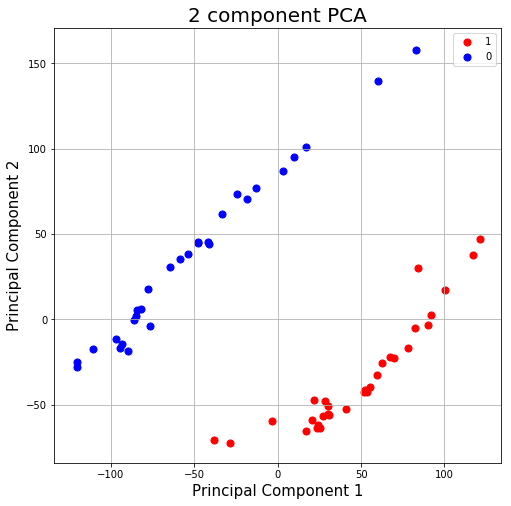

In [64]:
bigdata = pd.concat([X, X2], ignore_index=True)
labels = bigdata['Cluster']
labels = pd.DataFrame(labels)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(bigdata)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, labels], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['1', '0']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[finalDf['Cluster'] == int(target)] #remeber to change target to integer
    ax.scatter(indicesToKeep['principal component 1'].tolist() #remeber tolist() cause function takes in a list
               , indicesToKeep['principal component 2'].tolist(),
                c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [66]:
var = pca.explained_variance_ratio_
var.tolist
totalvar = (var[0]+var[1])*100
totalvar

83.71714833672945

# Try on Human Voice

## Training Model

In [67]:
import pandas as pd 
import _pickle as cPickle
import numpy as np
from scipy.io.wavfile import read
from sklearn.cluster import KMeans
import warnings
import numpy as np
from sklearn import preprocessing
import python_speech_features as mfcc
warnings.filterwarnings("ignore")

def extract_features(audio,rate):  
    mfcc_feat = mfcc.mfcc(audio,rate, 0.025, 0.01,41,appendEnergy = True,nfft=1500)
    mfcc_feat=np.array(pd.DataFrame(mfcc_feat).drop(0,axis=1))
    mfcc_feat = preprocessing.scale(mfcc_feat)
    return mfcc_feat 

dest = "clusters/"

train_file = "train.txt"        


file_paths = open(train_file,'r',encoding='utf-8-sig')

count = 1


features = np.asarray(())
for path in file_paths:    
    path = path.strip()   
    print (path)
    
    # read the audio
    sr,audio = read(path)
    
    # extract 40 dimensional MFCC & delta MFCC features
    vector   = extract_features(audio,sr)
    
    if features.size == 0:
        features = vector
    else:
        features = np.vstack((features, vector))
    # when features of 5 files of speaker are concatenated, then do model training

    if count == 5:    
        kmeans = KMeans(n_clusters= 16, max_iter = 200, algorithm="full",n_init = 3)
        kmeans.fit(features)
        
        # dumping the trained gaussian model
        picklefile = path.split("/")[2]+".kme"
        print (picklefile)
        cPickle.dump(kmeans,open(dest + picklefile,'wb'))
        print ('+ modeling completed for speaker:',picklefile," with data point = ",features.shape)    
        features = np.asarray(())
        count = 0
    count = count + 1

data/alice/al_1.wav
data/alice/al_2.wav
data/alice/al_3.wav
data/alice/al_4.wav
data/alice/al_5.wav
al_5.wav.kme
+ modeling completed for speaker: al_5.wav.kme  with data point =  (9873, 25)
data/simrita/si_1.wav
data/simrita/si_2.wav
data/simrita/si_3.wav
data/simrita/si_4.wav
data/simrita/si_5.wav
si_5.wav.kme
+ modeling completed for speaker: si_5.wav.kme  with data point =  (10482, 25)
data/hitesh/hi_1.wav
data/hitesh/hi_2.wav
data/hitesh/hi_3.wav
data/hitesh/hi_4.wav
data/hitesh/hi_5.wav
hi_5.wav.kme
+ modeling completed for speaker: hi_5.wav.kme  with data point =  (9903, 25)


## Testing Accuracy of Model on Individual Voices

data/alice/al_6.wav
0    173
1     19
2      9
Name: 0, dtype: int64
Speaker classified:  clusters/al_5.wav


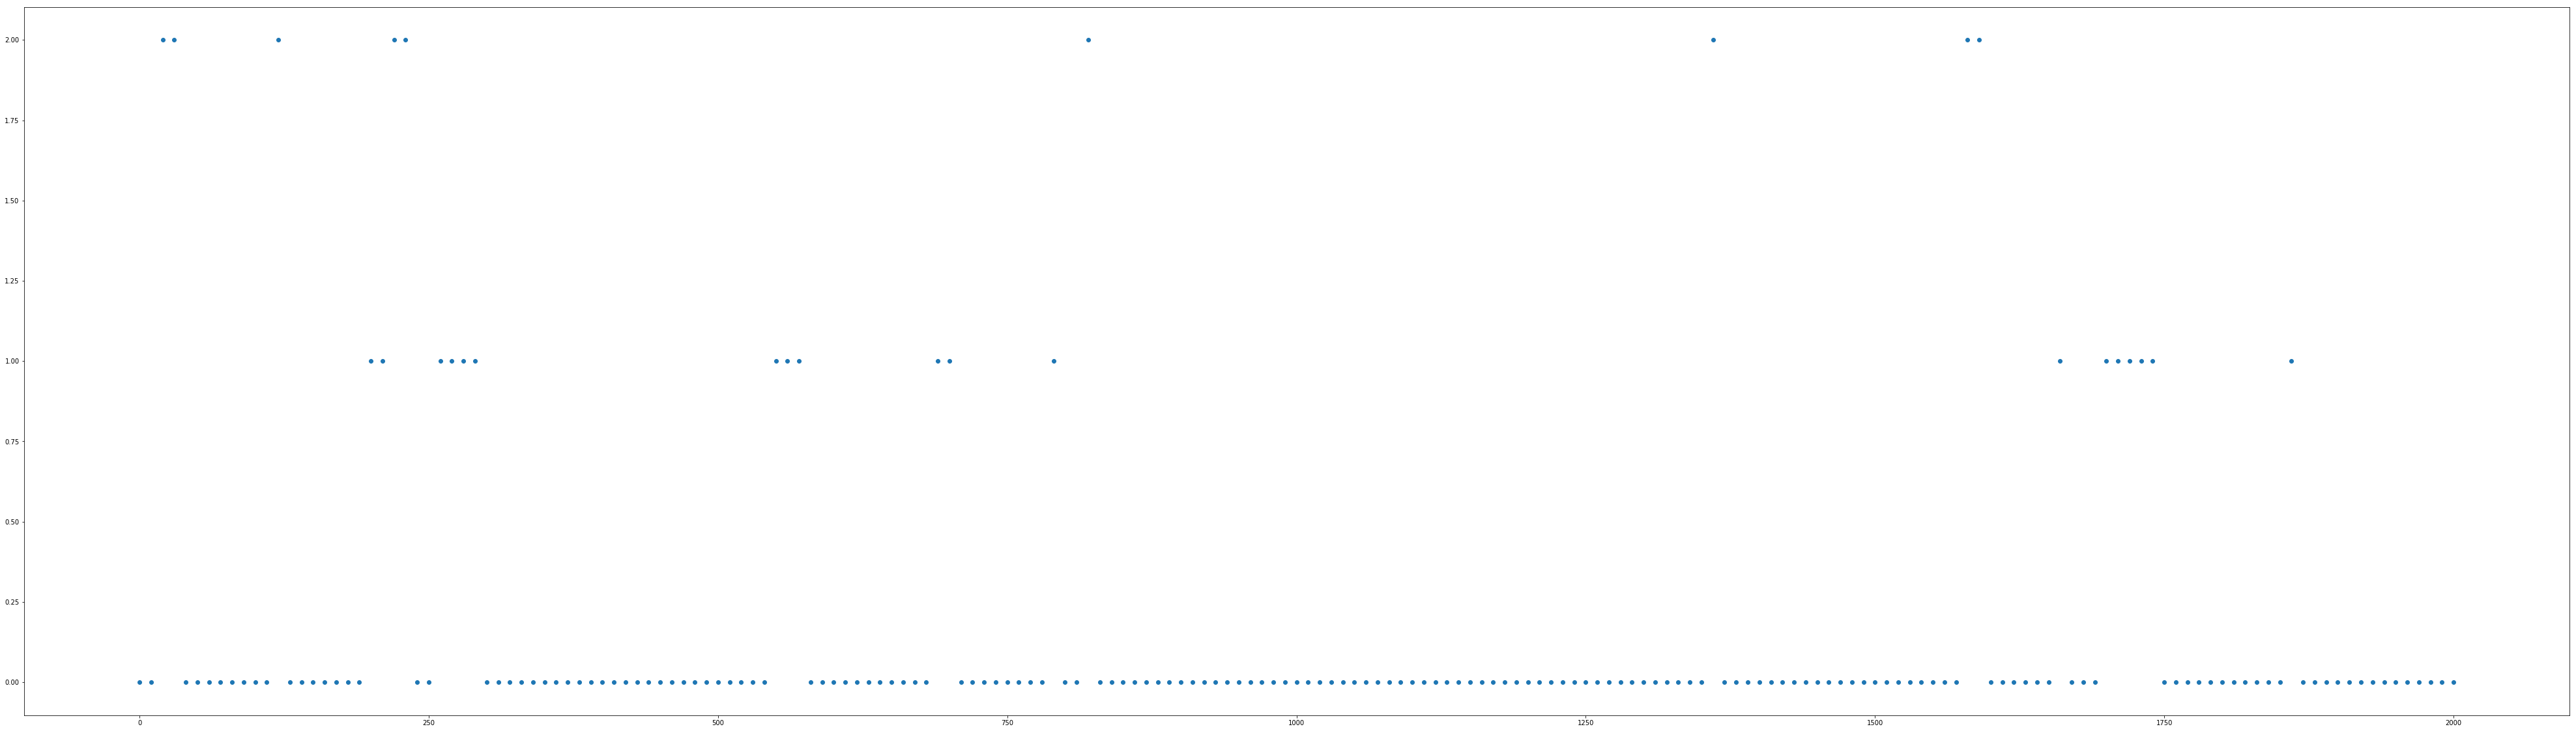

data/simrita/si_6.wav
2    190
0     27
1      7
Name: 0, dtype: int64
Speaker classified:  clusters/si_5.wav


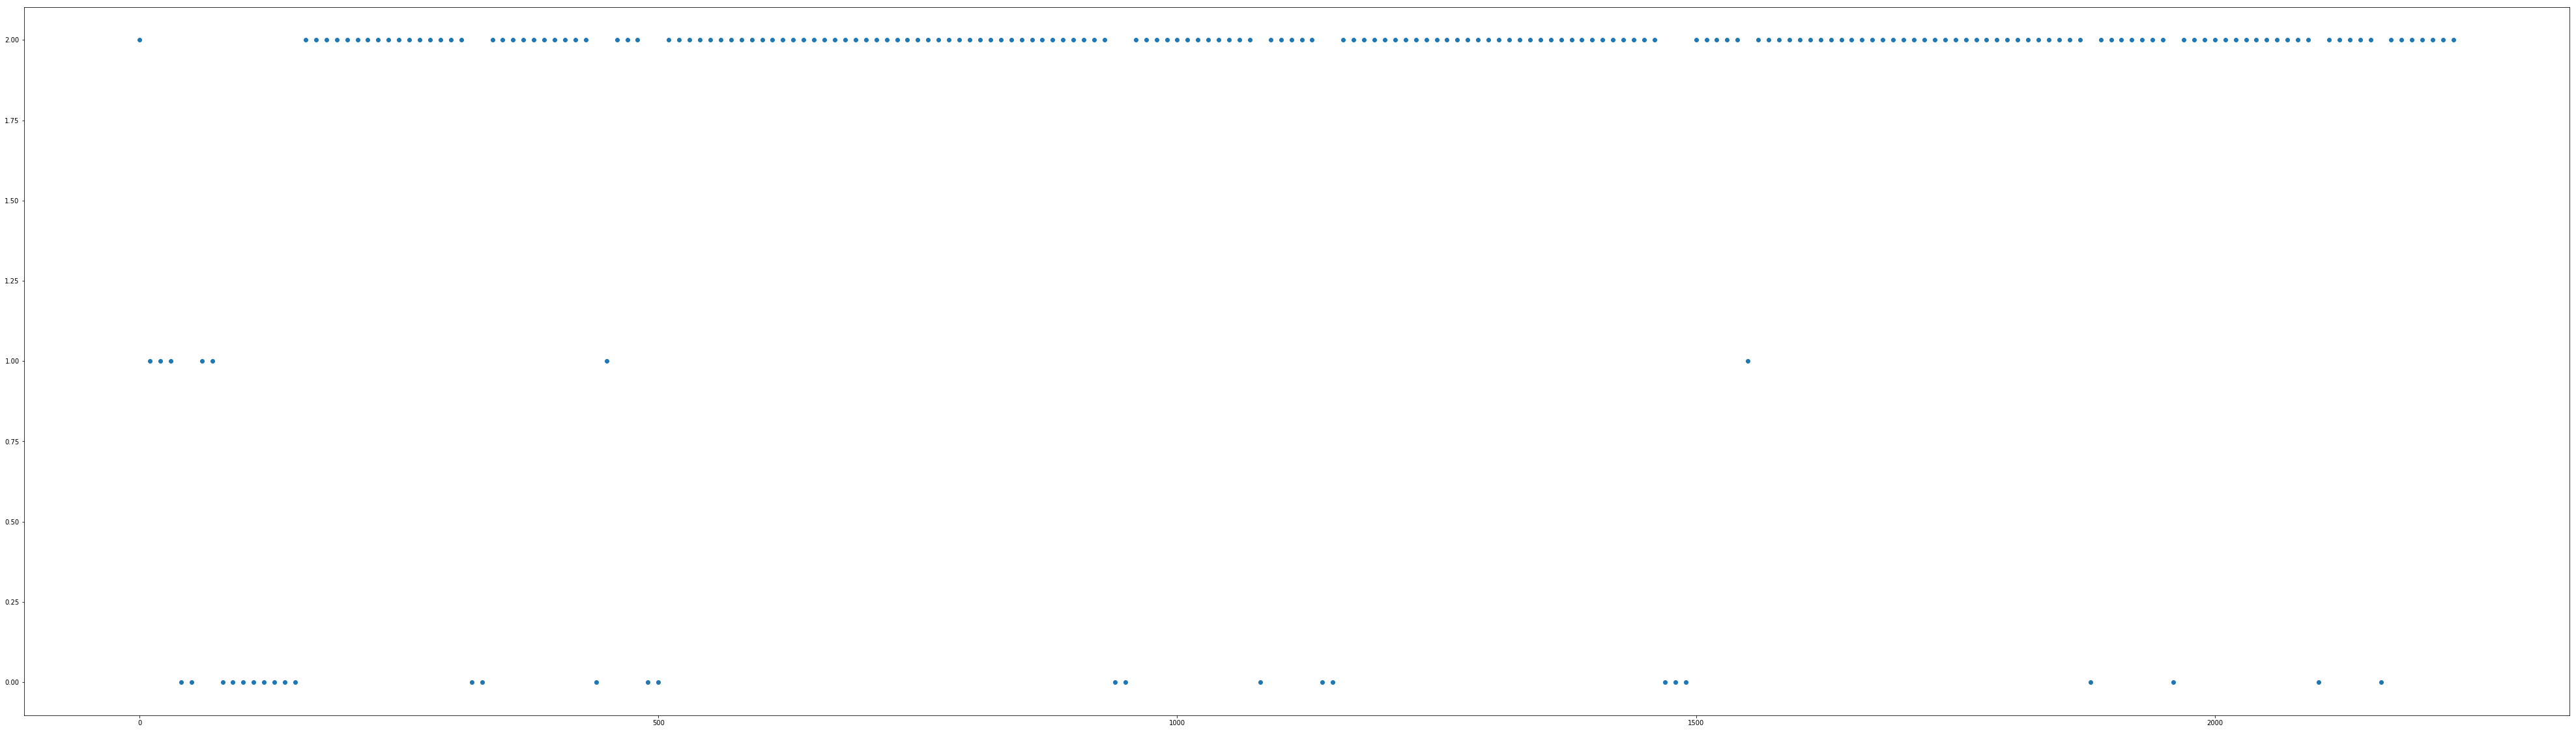

data/hitesh/hi_6.wav
1    202
0     16
2      1
Name: 0, dtype: int64
Speaker classified:  clusters/hi_5.wav


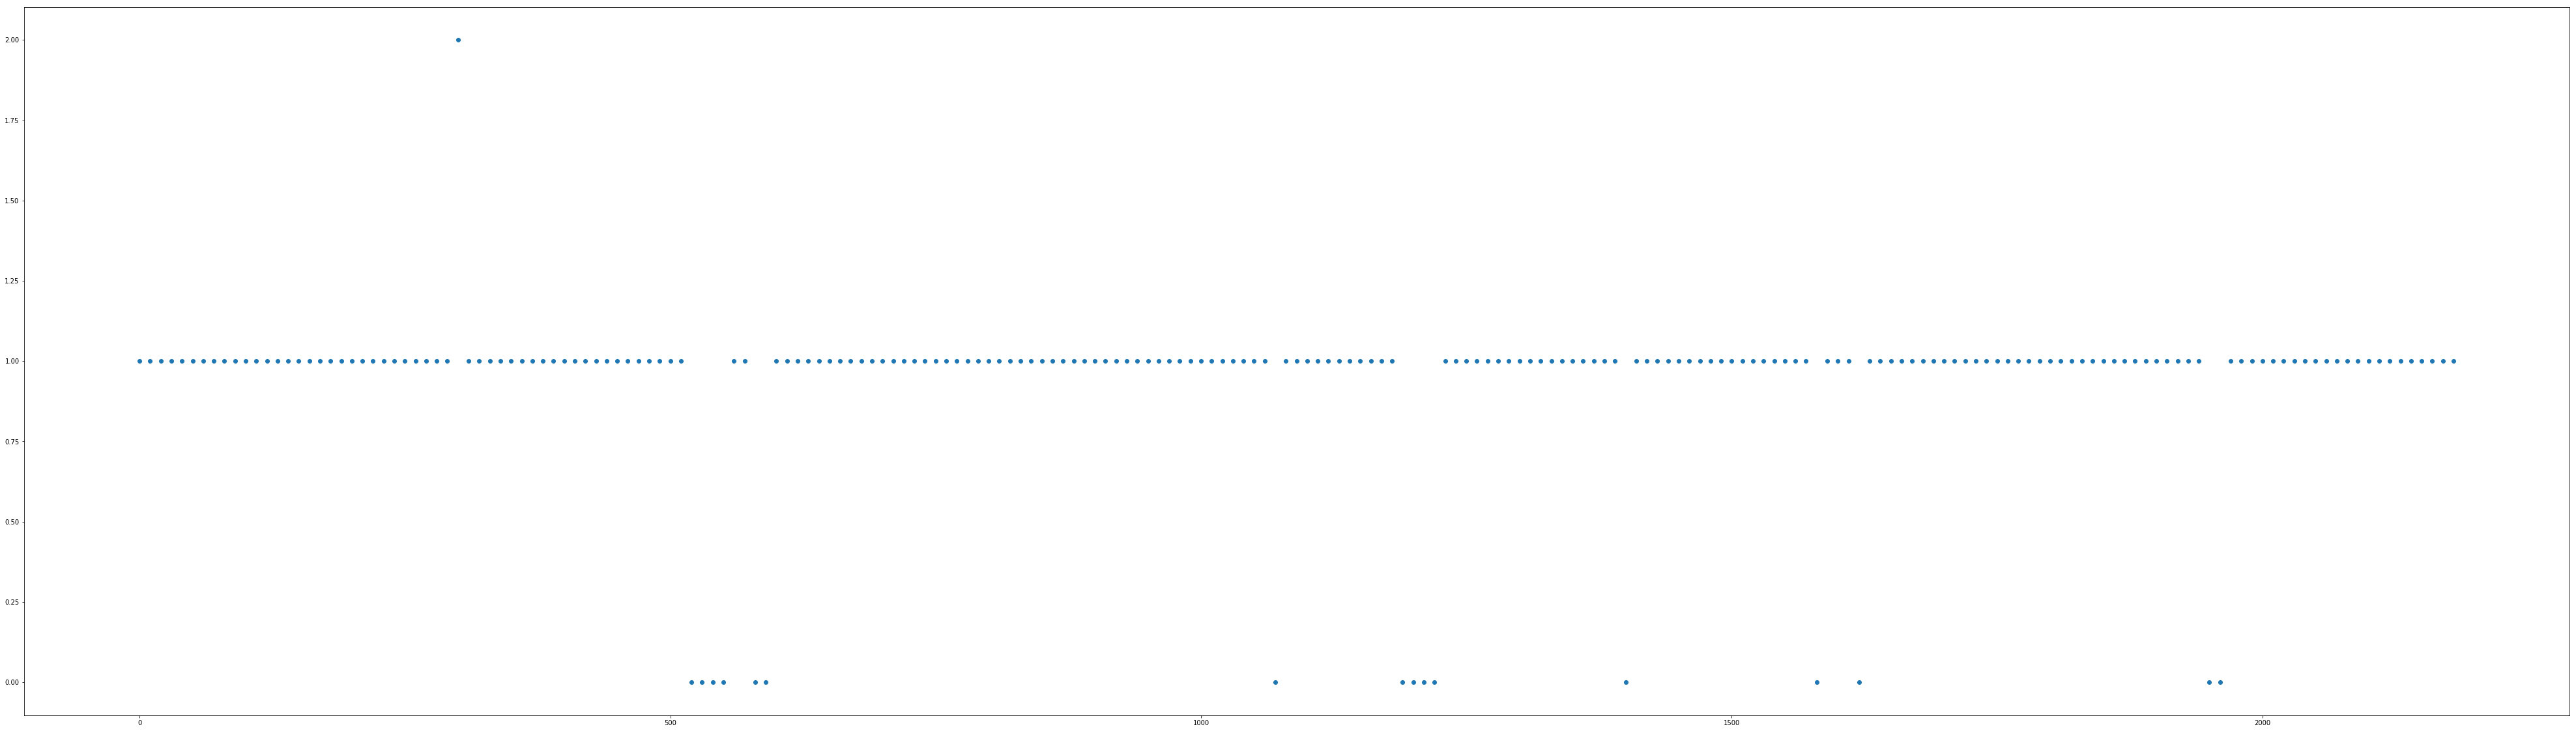

In [69]:
import os
import _pickle as cPickle
import numpy as np
from scipy.io.wavfile import read
import warnings
warnings.filterwarnings("ignore")
import time
import pandas as pd
import numpy as np
from sklearn import preprocessing
import python_speech_features as mfcc
import matplotlib.pyplot as plt

def extract_features(audio,rate):
    mfcc_feat = mfcc.mfcc(audio,rate, 0.025, 0.01,41,appendEnergy = True,nfft=1500)
    mfcc_feat=np.array(pd.DataFrame(mfcc_feat).drop(0,axis=1))
    mfcc_feat = preprocessing.scale(mfcc_feat)
    return mfcc_feat

modelpath = "clusters/"

test_file = "test.txt"        

file_paths = open(test_file,'r',encoding='utf-8-sig')


gmm_files = [os.path.join(modelpath,fname) for fname in 
              os.listdir(modelpath) if fname.endswith('.kme')]

#Load the Gaussian gender Models
models    = [cPickle.load(open(fname,'rb')) for fname in gmm_files]
speakers   = [fname.split("\\")[-1].split(".kme")[0] for fname 
              in gmm_files]

# Read the test directory and get the list of test audio files 
for path in file_paths:   
    
    path = path.strip()   
    print (path)
    sr,audio = read(path)
    vector   = extract_features(audio,sr)
    out = []
    for x in (range(0,vector.shape[0],10)):
        z = vector[x:x+20]
        log_likelihood = np.zeros(len(models)) 
        for i in range(len(models)):
            kmeans    = models[i]         #checking with each model one by one
            scores = np.array(kmeans.score(z))
            log_likelihood[i] = scores
        winner = np.argmax(log_likelihood)
        out.append(winner)
    pd.DataFrame(out)[0].unique()
    print(pd.DataFrame(out)[0].value_counts())
    print("Speaker classified: ", speakers[(pd.DataFrame(out)[0].value_counts().index[0])])
    f,ax = plt.subplots(1,1,figsize=(70,20))
    ax.scatter(x = np.arange(0,vector.shape[0],10),y=out)
    plt.show()

## Testing Accuracy of Model on Multiple Voices

0    554
1    400
2    393
Name: 0, dtype: int64
Speaker classified:  clusters/al_5.wav


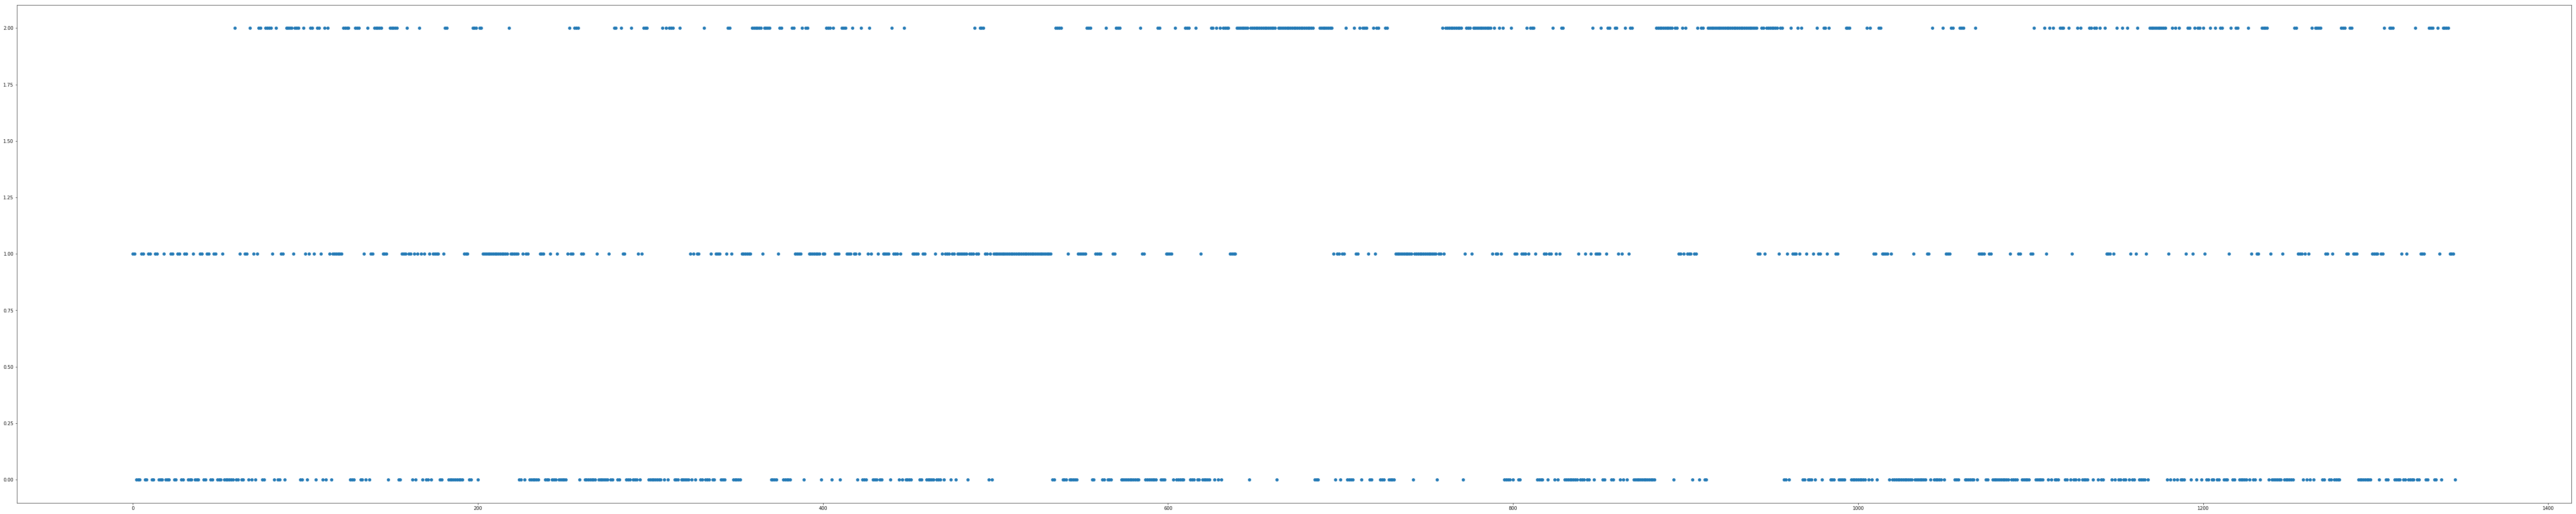

In [70]:
modelpath = "clusters/"


gmm_files = [os.path.join(modelpath,fname) for fname in 
              os.listdir(modelpath) if fname.endswith('.kme')]

#Load the Gaussian gender Models
models    = [cPickle.load(open(fname,'rb')) for fname in gmm_files]
speakers   = [fname.split("\\")[-1].split(".kme")[0] for fname 
              in gmm_files]

# Read the test directory and get the list of test audio files 

sr,audio = read("2_pitches.wav")
vector   = extract_features(audio,sr)
out = []
for x in (range(0,vector.shape[0],1)):
    z = vector[x]
    log_likelihood = np.zeros(len(models)) 
    for i in range(len(models)):
        kmeans    = models[i]         #checking with each model one by one
        scores = np.array(kmeans.score(z.reshape(1,-1)))
        log_likelihood[i] = scores
    winner = np.argmax(log_likelihood)
    out.append(winner)
pd.DataFrame(out)[0].unique()
print(pd.DataFrame(out)[0].value_counts())
print("Speaker classified: ", speakers[(pd.DataFrame(out)[0].value_counts().index[0])])
f,ax = plt.subplots(1,1,figsize=(100,20))
ax.scatter(x = np.arange(0,vector.shape[0],1),y=out)
plt.show()

## Identifying Pure Notes and Extracting them

In [71]:
time = np.arange(0,vector.shape[0],1)
time = time.tolist()

from itertools import groupby
L = out
grouped_L = [(k, sum(1 for i in g)) for k,g in groupby(L)]
cluster_time = []
time_seperate = []
k=0
counter=0
for i in grouped_L:
    cluster_time.append(i[1])
for i in cluster_time:
    j=0
    first = time[k]
    while (j != i):
        k +=1
        j+=1
    last = time[k-1]
    time_seperate.append([first,last,i,grouped_L[counter][0]])
    counter +=1
def sortThird(val): 
    return val[2] 
time_seperate.sort(key = sortThird, reverse = True)

cluster_0 = []
cluster_1 = []
cluster_2 = []

for i in range (0,len(time_seperate)):
    if time_seperate[i][3] == 1:
        cluster_1.append(time_seperate[i])
    if time_seperate[i][3] == 0:
        cluster_0.append(time_seperate[i])
    if time_seperate[i][3] == 2:
        cluster_2.append(time_seperate[i])        
        
cluster_slice = [cluster_0[0],cluster_1[0],cluster_2[0]]
from pydub import AudioSegment
for i in range(0,len(cluster_slice)):
    t1 = cluster_slice[i][0]*10/2
    t2 = cluster_slice[i][1]*10/2
    newAudio = AudioSegment.from_wav("2_pitches.wav")
    newAudio = newAudio[t1:t2]
    newAudio.export('Obama_2_'+str(i)+'.wav', format="wav")

## Original Audio

In [72]:
import librosa
# function to load files and extract features
file_name = "2_pitches.wav"
file = os.path.join(file_name)

# allowing playing of the loaded file
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
x, sr = librosa.load(file_name)
ipd.Audio(x, rate=sr)

## Sliced Audio: Detecting Notes

In [82]:
import librosa
# function to load files and extract features
file_name = "Obama_2_0.wav"
file = os.path.join(file_name)

# allowing playing of the loaded file
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
x, sr = librosa.load(file_name)
ipd.Audio(x, rate=sr)

In [91]:
# handle exception to check if there isn't a file which is corrupted
try:
  # here kaiser_fast is a technique used for faster extraction
  X, sample_rate = librosa.load(file, res_type='kaiser_fast') 
  # we extract average mfcc feature from data
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
  # we extract mfcc feature from data
  x=librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)  
except Exception as e:
  print("Error encountered while parsing file: ", file)

# creating dataframe
feature = mfccs
X = pd.DataFrame(x)
X3 = X.T
X3['Cluster'] = 0

In [84]:
import librosa
# function to load files and extract features
file_name = "Obama_2_1.wav"
file = os.path.join(file_name)

# allowing playing of the loaded file
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
x, sr = librosa.load(file_name)
ipd.Audio(x, rate=sr)

In [92]:
# handle exception to check if there isn't a file which is corrupted
try:
  # here kaiser_fast is a technique used for faster extraction
  X, sample_rate = librosa.load(file, res_type='kaiser_fast') 
  # we extract average mfcc feature from data
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
  # we extract mfcc feature from data
  x=librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40)  
except Exception as e:
  print("Error encountered while parsing file: ", file)

# creating dataframe
feature = mfccs
X2 = pd.DataFrame(x)
X4 = X2.T
X4['Cluster'] = 1

In [75]:
import librosa
# function to load files and extract features
file_name = "Obama_2_2.wav"
file = os.path.join(file_name)

# allowing playing of the loaded file
import numpy, scipy, matplotlib.pyplot as plt, IPython.display as ipd, sklearn
import librosa, librosa.display
x, sr = librosa.load(file_name)
ipd.Audio(x, rate=sr)

## PCA

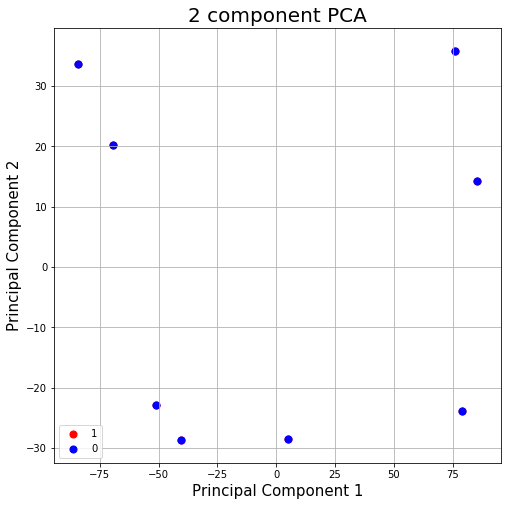

In [93]:
bigdata = pd.concat([X3, X4], ignore_index=True)
labels = bigdata['Cluster']
labels = pd.DataFrame(labels)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(bigdata)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, labels], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['1', '0']
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf[finalDf['Cluster'] == int(target)] #remeber to change target to integer
    ax.scatter(indicesToKeep['principal component 1'].tolist() #remeber tolist() cause function takes in a list
               , indicesToKeep['principal component 2'].tolist(),
                c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# Speech Recognition 

In [95]:
import speech_recognition as sr
r = sr.Recognizer()
file = sr.AudioFile("2_pitches.wav")
with file as source:
    audio = r.record(source)
r.recognize_google(audio)

'hi hi hello'